In [3]:
print ("INITIALIZATION : START")

import os,h5py,glob,time,pickle,shutil
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from imageio import imread
from skimage import transform,io
import numpy as np
import tensorflow as tf
from skimage import transform,io
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.metrics.pairwise import cosine_similarity

import warnings 
with warnings.catch_warnings(): 
    warnings.filterwarnings("ignore",category=FutureWarning) 


print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)


print ("INITIALIZATION : DONE")

INITIALIZATION : START
TensorFlow version: 1.12.0
Keras version: 2.1.6-tf
INITIALIZATION : DONE


In [2]:
print ("NETWORK DESING : START")

# load pre-trained deep neural network
model_loaded = VGG16(weights='imagenet')
#  remove classification layer
#model  = Model(model_loaded.input, model_loaded.output)
model = Model(inputs=model_loaded.input, outputs=model_loaded.get_layer('block2_pool').output)
print(model.summary)
    # compile the model (should be done *after* setting layers)
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss="mean_absolute_percentage_error", metrics=["accuracy"])  
model.summary()
print ("NETWORK DESING : DONE")

NETWORK DESING : START
<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7fff228832e8>>
NETWORK DESING : DONE


# Load images (with and without defects)

LOAD DATA : START


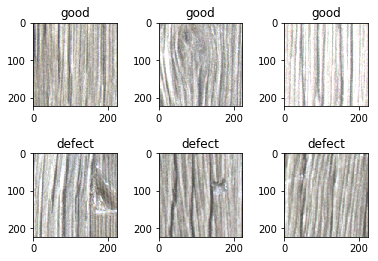

LOAD DATA : DONE


In [4]:
   
print ("LOAD DATA : START")  

samples_path = '/data/CRVI/TEST/MIRALIS/DATA/IMtext_train_test/train/'#os.path.join('../DATA','test_texture')
samples_type = '*.png'


# Parameters ---------------------------------------------------------------------------------
# class_names = ['GOOD', 'DEFECT'] # one classe 
class_names = ['GOOD', 'DEFECT'] 

x_input, x_rep = [], []

for category, ImageDir in enumerate(class_names):
    
    img_paths = glob.glob(os.path.join(samples_path, ImageDir, samples_type))
    
    k = min(100,len(img_paths))
    
    files = img_paths[:k]

    for idx, f in enumerate(files):
#         img = image.load_img(f, target_size=(224, 224))
#         x = image.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = preprocess_input(x)
        
        
        
        img = np.asarray(imread(f))[:,:,:3].astype('float32') / 255.
        
#         # normalization
#         img = 2*(img - 0.5)
        
        x_input.append(img)
        x = np.expand_dims(img, axis=0)      
        
        x_rep.append(model.predict(x)) 
        
 
x_train = np.asarray(x_input)
        
x_rep_all = model.predict(x_train)


def do_plot(ax, Z, TI, cmap=None, colors=None):
   
#     Z = ((Z/2)+0.5)*255
    
   
    im = ax.imshow((Z*255).astype(np.uint8),cmap=cmap)
    ax.set_title(TI)
    

im2 = x_input

nrow = 2; ncol = 3;

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrow, ncol )
plt.subplots_adjust(hspace=0.5, wspace=0.5)
do_plot(ax1,im2[0],'good',cmap=plt.get_cmap('gray'))
do_plot(ax2,im2[1],'good',cmap=plt.get_cmap('gray'))
do_plot(ax3,im2[2],'good',cmap=plt.get_cmap('gray'))
do_plot(ax4,im2[-1],'defect',cmap=plt.get_cmap('gray'))
do_plot(ax5,im2[-2],'defect',cmap=plt.get_cmap('gray'))
do_plot(ax6,im2[-3],'defect',cmap=plt.get_cmap('gray'))
plt.show()
       
print ("LOAD DATA : DONE")   

# Calculate cosine similarity between images 

In [14]:
print ("Cosine similarity : START")   

k = min(100,len(img_paths))

im_vector = []

for i in range(len(x_rep)):
    M = np.squeeze(x_rep[i], axis=0)     
    M = M.reshape(-1)   
    im_vector.append(M)
    
ima = np.asarray(im_vector)

print(ima.shape)

dist  = cosine_similarity(ima)

print('cosine_similarity',dist)

print('distance max / min ', np.max(dist), np.min(dist)) 

print('calculate similarity between images without defect')

im_good = x_rep[:k]
im_defect = x_rep[k:]

im_goodvector,im_defectvector = [],[]

print(k,len(x_rep),len(im_defect),len(im_good))

for i in range(k):
    M1 = np.squeeze(im_good[i], axis=0)     
    M1 = M1.reshape(-1)   
    im_goodvector.append(M1)
    M2 = np.squeeze(im_defect[i], axis=0)     
    M2 = M2.reshape(-1)   
    im_defectvector.append(M2)

im1 = np.asarray(im_goodvector)
im2 = np.asarray(im_defectvector)

print(ima.shape)

distG  = cosine_similarity(im1)
print('distance good images max / min / mean', np.max(distG), np.min(distG), np.mean(distG)) 
distD  = cosine_similarity(im2)
print('distance defect images max / min / mean', np.max(distD), np.min(distD), np.mean(distD)) 




print ("Cosine similarity : DONE")



Cosine similarity : START
(200, 401408)
cosine_similarity [[1.0000899  0.68698156 0.68461984 ... 0.6805494  0.66228324 0.6769021 ]
 [0.68698156 1.0000758  0.6760214  ... 0.70552987 0.67587    0.67236614]
 [0.68461984 0.6760214  1.00008    ... 0.676818   0.71811706 0.69731283]
 ...
 [0.6805494  0.70552987 0.676818   ... 1.000074   0.6731833  0.6683076 ]
 [0.66228324 0.67587    0.71811706 ... 0.6731833  1.0001011  0.6961325 ]
 [0.6769021  0.67236614 0.69731283 ... 0.6683076  0.6961325  1.0000789 ]]
distance max / min  1.0001011 0.5137948
calculate similarity between images without defect
100 200 100 100
(200, 401408)
distance good images max / min / mean 1.0001005 0.56130534 0.68363065
distance defect images max / min / mean 1.0001011 0.5137948 0.67607296
Cosine similarity : DONE


# load only images without defect

In [16]:
print ("LOAD GOOD IMAGES : START")  

samples_path = '/data/CRVI/TEST/MIRALIS/DATA/IMtext_train_test/train/'#os.path.join('../DATA','test_texture')
samples_type = '*.png'


# Parameters ---------------------------------------------------------------------------------

class_names = ['GOOD'] 

x_GOOD = []

for category, ImageDir in enumerate(class_names):
    
    img_paths = glob.glob(os.path.join(samples_path, ImageDir, samples_type))
    
    k = min(1000,len(img_paths))
    
    files = img_paths[:k]

    for idx, f in enumerate(files):    
        
        
        img = np.asarray(imread(f))[:,:,:3].astype('float32') / 255.
        
#         # normalization
#         img = 2*(img - 0.5)
        x_GOOD.append(img)
 
x_good_arr = np.asarray(x_GOOD)
        
print ("LOAD GOOD IMAGES : DONE") 

LOAD GOOD IMAGES : START
LOAD GOOD IMAGES : DONE


# load images to test

In [17]:
print ("LOAD DATA TO TEST: START")


samples_path = '/data/CRVI/TEST/MIRALIS/DATA/IMtext_train_test/test/'
samples_type = '*.png'


# Parameters ---------------------------------------------------------------------------------
# class_names = ['GOOD', 'DEFECT'] # one classe 
class_names = ['GOOD', 'DEFECT'] 

x_test, x_rep_test = [],[]

for category, ImageDir in enumerate(class_names):
    
    img_paths = glob.glob(os.path.join(samples_path, ImageDir, samples_type))
    
    k = min(10,len(img_paths))
    
    files = img_paths[:k]

    for idx, f in enumerate(files):

        
        img = np.asarray(imread(f))[:,:,:3].astype('float32') / 255.
        
#         # normalization
#         img = 2*(img - 0.5)
        
        x_test.append(img)
        x = np.expand_dims(img, axis=0)       
        x_rep_test.append(model.predict(x)) 
        


        
print ("LOAD DATA : DONE")   

LOAD DATA TO TEST: START
LOAD DATA : DONE


# Calculate similarity between images without defect and test images

In [18]:
print('distance calculation on test')


print('predictions')

pred_test = model.predict(np.asarray(x_test)) 
        
pred_good = model.predict(x_good_arr)        


pred_good_vector = [x.reshape(-1) for x in pred_good]
pred_test_vector = [x.reshape(-1) for x in pred_test]


G = np.asarray(pred_good_vector)
T = np.asarray(pred_test_vector)


dist_test = []
Mat = pred_good_vector
for i in range(len(pred_test)):
    
    
    Mat.append(pred_test_vector[i])
    
    distCos  = cosine_similarity(np.asarray(Mat))
    
    print(np.mean(distCos[i]),len(Mat))
    
    
    dist_test.append(np.mean(distCos[i]))
    
    Mat.pop(-1)
                                   

dis = np.asarray(dist_test)                                  
dis[dis > 0.67] = 1 
dis[dis <= 0.67] = 0                                    
   


distance calculation on test
predictions
0.68577665 1001
0.68237996 1001
0.68901855 1001
0.6572851 1001
0.68854696 1001
0.6944179 1001
0.6825116 1001
0.6649309 1001
0.6691143 1001
0.6876986 1001
0.6821099 1001
0.67810744 1001
0.6942288 1001
0.69864315 1001
0.6864131 1001
0.6819136 1001
0.6702847 1001
0.68471694 1001
0.6581497 1001
0.69109875 1001


In [19]:
print(dis)

[1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
